In [65]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [66]:
pip install pandas numpy 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [67]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [72]:
import pandas as pd
import numpy as np
import os
from pyspark.sql.functions import lit,col
from pyspark.sql.types import *
import uuid
import warnings
from imblearn.over_sampling import RandomOverSampler
from scipy import stats
import matplotlib.pyplot as plt



In [70]:
data_train = pd.read_csv('/content/drive/MyDrive/Estudos_no_CIn/Cadeira_de_dados/TRAIN', delim_whitespace=True)
data_train.to_csv('Train.csv', header=True, index=False)
train_aux_1 = data_train[data_train.ALVO == 1]
train_aux_0 = data_train[data_train.ALVO == 0]
x = train_aux_1.shape[0] - train_aux_0.shape[0]
train_aux_1 = train_aux_1.iloc[x:]
train_aux_0.append(train_aux_1)
train_res = train_aux_0.sample(frac = 1)

train_res.to_csv('Train.csv', header=True, index=False)

In [ ]:
pd.read_csv("/content/drive/MyDrive/Estudos_no_CIn/Cadeira_de_dados/Train.csv")

,ALVO,IDADE_PCNC_PNM_perc,LATITUDE_PCNC_PNM_perc,LONGITUDE_PCNC_PNM_perc,COMPARATIVO_RENDA_PCNC_PNM_perc,ATIVIDADE_MERCADO_FINANCEIRO_PCNC_PNM_perc,ATIVIDADE_EMAIL_PCNC_PNM_perc,ATIVIDADE_ENDERECO_PCNC_PNM_perc,ATIVIDADE_TELEFONE_PCNC_PNM_perc,ULTIMA_PASSAGEM_MERCADO_FINANCEIRO_PCNC_PNM_perc,...,FLAG_WEB_SAUDE_PCNC_PCM_rv_0,FLAG_WEB_SAUDE_PCNC_PCM_rv_1,FLAG_WEB_SOCIEDADE_PCNC_PCM_rv_0,FLAG_WEB_SOCIEDADE_PCNC_PCM_rv_1,FLAG_WEB_SOCIEDADE_GENEALOGIA_PCNC_PCM_rv_0,FLAG_WEB_SOCIEDADE_GENEALOGIA_PCNC_PCM_rv_1,FLAG_WEB_TV_PCNC_PCM_rv_0,FLAG_WEB_TV_PCNC_PCM_rv_1,PROPHET_LABEL,PROPHET_NORM_FEATURES
0,1,31.521000,-30.046875,-35.000000,2.0,0.191,1.000,0.268,0.230,3.583333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.2198685669971716,0.0,1.0,0.75,0.19099999964..."
1,1,60.092999,-25.556696,-49.180309,3.0,0.095,1.000,0.268,0.215,0.083333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.7046533385682355,0.15685412408624233,0.5086..."
2,1,33.377998,-22.748457,-45.123432,1.0,0.159,0.570,0.742,0.514,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.25137649820679137,0.25495352276415023,0.649..."
3,1,45.446999,-26.795879,-49.263866,3.0,0.155,1.000,0.268,0.133,2.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.4561527761682056,0.11356608853728693,0.5057..."
4,0,21.707001,-29.454201,-51.137047,0.0,0.132,0.327,0.225,1.000,0.916667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,"[0.05335318191723994,0.020703718028469018,0.44..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389292,1,76.611000,-24.098770,-48.365204,3.0,1.000,1.000,0.268,1.000,15.999999,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.9849163934738716,0.20778342348435694,0.5368..."
389293,1,31.981001,-21.602396,-46.902092,3.0,0.195,0.771,0.634,0.796,3.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.22767346293372231,0.29498853762227256,0.587..."
389294,1,39.573002,-23.339357,-51.152607,3.0,0.064,1.000,0.268,1.000,1.250000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.35648791878643676,0.2343117695727964,0.4402..."
389295,1,27.395000,-23.558638,-46.406036,0.0,0.505,0.562,0.234,0.536,9.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"[0.14986220414271567,0.2266517163859313,0.6047..."


In [69]:
tabelinha = pd.read_csv("/content/drive/MyDrive/Estudos_no_CIn/Cadeira_de_dados/Train.csv")

In [74]:
tabelinha.dtypes

ALVO                                             int64
IDADE_PCNC_PNM_perc                            float64
LATITUDE_PCNC_PNM_perc                         float64
LONGITUDE_PCNC_PNM_perc                        float64
COMPARATIVO_RENDA_PCNC_PNM_perc                float64
                                                ...   
FLAG_WEB_SOCIEDADE_GENEALOGIA_PCNC_PCM_rv_1    float64
FLAG_WEB_TV_PCNC_PCM_rv_0                      float64
FLAG_WEB_TV_PCNC_PCM_rv_1                      float64
PROPHET_LABEL                                  float64
PROPHET_NORM_FEATURES                           object
Length: 312, dtype: object

In [75]:
tabelinha = tabelinha.drop(columns=tabelinha.columns[120::])

In [76]:
tabelinha.dtypes

ALVO                                        int64
IDADE_PCNC_PNM_perc                       float64
LATITUDE_PCNC_PNM_perc                    float64
LONGITUDE_PCNC_PNM_perc                   float64
COMPARATIVO_RENDA_PCNC_PNM_perc           float64
                                           ...   
CONCENTRACAO_LAVA_RAPIDO_PCNC_PCM_rv_2    float64
CONCENTRACAO_METRO_PCNC_PCM_rv_0          float64
CONCENTRACAO_METRO_PCNC_PCM_rv_1          float64
CONCENTRACAO_OFICINAS_PCNC_PCM_rv_0       float64
CONCENTRACAO_OFICINAS_PCNC_PCM_rv_1       float64
Length: 120, dtype: object

In [77]:
tabelinha.shape

(389297, 120)

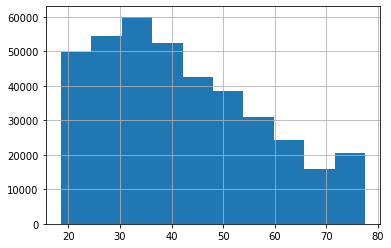

In [ ]:
tabelinha["IDADE_PCNC_PNM_perc"].hist()

In [ ]:
tabelinha["VALOR_PARCELA_BOLSA_FAMILIA_PCNC_PNM_perc"].describe()

count    389297.000000
mean         27.949419
std          26.470386
min          22.000000
25%          22.000000
50%          22.000000
75%          22.000000
max         191.999980
Name: VALOR_PARCELA_BOLSA_FAMILIA_PCNC_PNM_perc, dtype: float64

In [ ]:
tabelinha['normbol'] = tabelinha["VALOR_PARCELA_BOLSA_FAMILIA_PCNC_PNM_perc"]/22

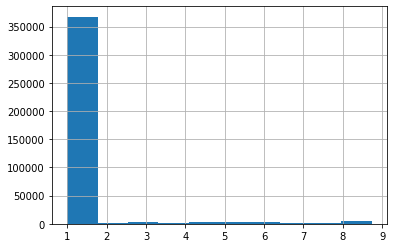

In [ ]:
tabelinha['normbol'].hist()

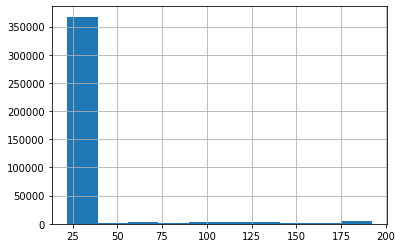

In [ ]:
tabelinha["VALOR_PARCELA_BOLSA_FAMILIA_PCNC_PNM_perc"].hist()

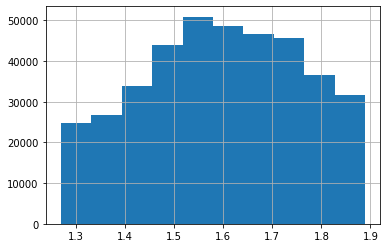

In [ ]:
tabelinha["log"] = tabelinha["IDADE_PCNC_PNM_perc"].apply(np.log10)
tabelinha[tabelinha["log"]>0]["log"].hist()

In [ ]:
tabelinha['IDADE_PCNC_PNM_perc'].mean()

42.16125805029977

In [ ]:
tabelinha['IDADE_PCNC_PNM_perc'].median()

39.49599838256836

In [ ]:
tabelinha['IDADE_PCNC_PNM_perc'].mode()

0    77.312492
dtype: float64

In [ ]:
tabelinha['IDADE_PCNC_PNM_perc'].describe()

count    389297.000000
mean         42.161258
std          15.544861
min          18.562498
25%          29.677000
50%          39.495998
75%          53.025002
max          77.499990
Name: IDADE_PCNC_PNM_perc, dtype: float64

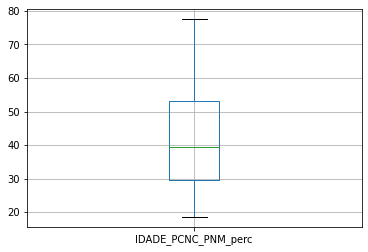

In [ ]:
tabelinha.boxplot(column=['IDADE_PCNC_PNM_perc'])

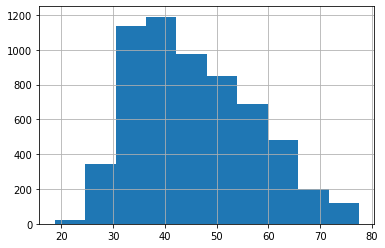

In [ ]:
tabelinha[tabelinha["CLASSE_SOCIAL_PCNC_PCM_rv_0"]==1]["IDADE_PCNC_PNM_perc"].hist()

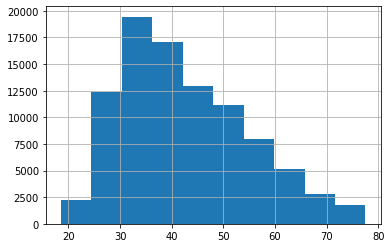

In [ ]:
tabelinha[tabelinha["CLASSE_SOCIAL_PCNC_PCM_rv_1"]==1]["IDADE_PCNC_PNM_perc"].hist()

In [ ]:
tabelinha[tabelinha["CLASSE_SOCIAL_PCNC_PCM_rv_0"]==1]["IDADE_PCNC_PNM_perc"].describe()

count    6003.000000
mean       45.712778
std        11.494673
min        18.721001
25%        36.386499
50%        43.997002
75%        53.869499
max        77.499990
Name: IDADE_PCNC_PNM_perc, dtype: float64

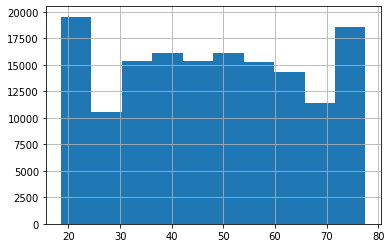

In [ ]:
tabelinha[tabelinha["CLASSE_SOCIAL_PCNC_PCM_rv_2"]==1]["IDADE_PCNC_PNM_perc"].hist()

In [ ]:
tabelinha[tabelinha["CLASSE_SOCIAL_PCNC_PCM_rv_0"]==1]["IDADE_PCNC_PNM_perc"].median()

43.99700164794922

In [ ]:
tabelinha[tabelinha["CLASSE_SOCIAL_PCNC_PCM_rv_1"]==1]["IDADE_PCNC_PNM_perc"].median()

40.31499862670898

In [ ]:
tabelinha[tabelinha["CLASSE_SOCIAL_PCNC_PCM_rv_2"]==1]["IDADE_PCNC_PNM_perc"].median()

47.81100082397461

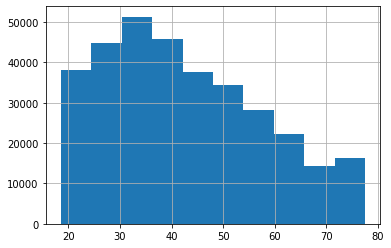

In [ ]:
tabelinha[tabelinha["ALVO"]==1]["IDADE_PCNC_PNM_perc"].hist()

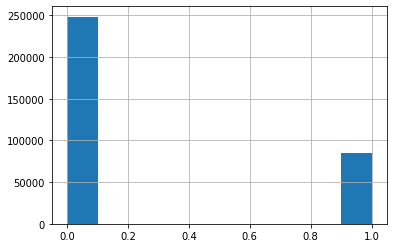

In [ ]:
tabelinha[tabelinha["ALVO"]==1]["CLASSE_SOCIAL_PCNC_PCM_rv_1"].hist()

In [78]:
tabelinha.head()

,ALVO,IDADE_PCNC_PNM_perc,LATITUDE_PCNC_PNM_perc,LONGITUDE_PCNC_PNM_perc,COMPARATIVO_RENDA_PCNC_PNM_perc,ATIVIDADE_MERCADO_FINANCEIRO_PCNC_PNM_perc,ATIVIDADE_EMAIL_PCNC_PNM_perc,ATIVIDADE_ENDERECO_PCNC_PNM_perc,ATIVIDADE_TELEFONE_PCNC_PNM_perc,ULTIMA_PASSAGEM_MERCADO_FINANCEIRO_PCNC_PNM_perc,...,CONCENTRACAO_IGREJA_PCNC_PCM_rv_0,CONCENTRACAO_IGREJA_PCNC_PCM_rv_1,CONCENTRACAO_IGREJA_PCNC_PCM_rv_2,CONCENTRACAO_LAVA_RAPIDO_PCNC_PCM_rv_0,CONCENTRACAO_LAVA_RAPIDO_PCNC_PCM_rv_1,CONCENTRACAO_LAVA_RAPIDO_PCNC_PCM_rv_2,CONCENTRACAO_METRO_PCNC_PCM_rv_0,CONCENTRACAO_METRO_PCNC_PCM_rv_1,CONCENTRACAO_OFICINAS_PCNC_PCM_rv_0,CONCENTRACAO_OFICINAS_PCNC_PCM_rv_1
0,1,31.521000,-30.046875,-35.000000,2.0,0.191,1.000,0.268,0.230,3.583333,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,60.092999,-25.556696,-49.180309,3.0,0.095,1.000,0.268,0.215,0.083333,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,33.377998,-22.748457,-45.123432,1.0,0.159,0.570,0.742,0.514,3.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1,45.446999,-26.795879,-49.263866,3.0,0.155,1.000,0.268,0.133,2.166667,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0,21.707001,-29.454201,-51.137047,0.0,0.132,0.327,0.225,1.000,0.916667,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [91]:
stats.ttest_ind(tabelinha['ALVO'],tabelinha['IDADE_PCNC_PNM_perc'])

Ttest_indResult(statistic=-1657.4884139479132, pvalue=0.0)

In [92]:
stats.ttest_ind(tabelinha['CLASSE_SOCIAL_PCNC_PCM_rv_0'],tabelinha['ALVO'])

Ttest_indResult(statistic=-1408.3560284026146, pvalue=0.0)

In [93]:
stats.ttest_ind(tabelinha['CLASSE_SOCIAL_PCNC_PCM_rv_1'],tabelinha['ALVO'])

Ttest_indResult(statistic=-697.5605417551832, pvalue=0.0)

In [94]:
stats.ttest_ind(tabelinha['CLASSE_SOCIAL_PCNC_PCM_rv_2'],tabelinha['ALVO'])

Ttest_indResult(statistic=-480.6556082788804, pvalue=0.0)

In [87]:
stats.ttest_rel(tabelinha['CLASSE_SOCIAL_PCNC_PCM_rv_1'],tabelinha['CLASSE_SOCIAL_PCNC_PCM_rv_0'])

Ttest_relResult(statistic=307.9220734862676, pvalue=0.0)

In [88]:
stats.ttest_rel(tabelinha['CLASSE_SOCIAL_PCNC_PCM_rv_1'],tabelinha['CLASSE_SOCIAL_PCNC_PCM_rv_2'])

Ttest_relResult(statistic=-144.00831144510636, pvalue=0.0)

In [90]:
stats.ttest_ind(tabelinha['CLASSE_SOCIAL_PCNC_PCM_rv_0'],tabelinha['CLASSE_SOCIAL_PCNC_PCM_rv_2'])

Ttest_indResult(statistic=-467.04570908480605, pvalue=0.0)